# Using and formatting axes in matplotlib
In this notebook, different methods are demonstrated to get the axes on your graphs right, if you need more than what `plt.plot(x,y)` gives you by default. Note however, that with *axes*, I mean the *x* and *y* axis in this notebook and not `axes` from matplotlib (which is more or less your plotting area, i.e. the subplot).

In [1]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np

In [2]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0 # in this plots, we don't want any free space left and right
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.figsize'] = [4,2.5] # and the plots are just for illustration, so make them a bit smaller

## Minor und Major ticks
The easiest way to set minor ticks is to use `plt.minorticks_on()`, then `matplotlib` creates minor ticks automatically.

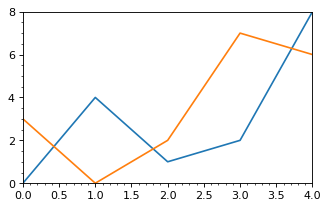

In [3]:
plt.plot(range(5),[0,4,1,2,8])
plt.plot(range(5),[3,0,2,7,6])
plt.minorticks_on()

To have more control over the minor and major ticks, you can use `ax.xaxis.set_major_locator(plt.Multiplelocator(a))`, where `a` is the interval on which the ticks will be created. There are several locator functions, which are well described [in the documentation](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html). You can also use functions and methods to modify the label text, which is [also well described](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html).

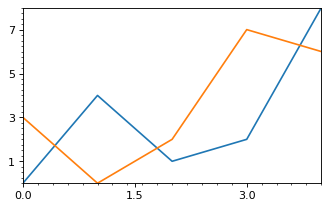

In [4]:
plt.plot(range(5),[0,4,1,2,8])
plt.plot(range(5),[3,0,2,7,6])
ax = plt.gca()

ax.xaxis.set_major_locator(plt.MaxNLocator(3)) # make at most 3 ticks at nice locations
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.2)) # ticks every 0.1

ax.yaxis.set_major_locator(plt.IndexLocator(2,1)) # ticks every 2, with an offset of 1
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))

## Plotting versus time
### The easy way

It is really easy to plot data versus timestamps by using `np.datetime64` for the *x*-data. If you have the timestamp as a string, you can simply convert from the following formats

In [5]:
np.datetime64("2021-12-24 11:22:33")

numpy.datetime64('2021-12-24T11:22:33')

In [6]:
np.datetime64("2021-12-24T16:00")

numpy.datetime64('2021-12-24T16:00')

If you have a UNIX timestamp (seconds since Epoch), you can convert it by specifying `"s"` as unit. However, the value has to be integer:

In [7]:
import time

time.time()

1637935130.469164

In [8]:
np.datetime64(time.time(),"s") #this leads to an error

ValueError: Could not convert object to NumPy datetime

In [9]:
np.datetime64(int(time.time()),"s") #this is fine

numpy.datetime64('2021-11-26T13:58:54')

If you need the sub-second precision, you can simply use `"ms"`, `"us"`, `"ns"`, and so on. But remember to multiply your timestamp as well!

In [10]:
np.datetime64(int(time.time()*1e9),"ns")

numpy.datetime64('2021-11-26T13:58:55.112920320')

In [11]:
t = np.linspace(1609000000,1638000000,500)

t = np.array(t,dtype="datetime64[s]") #convert it to np.datetime64 as seconds

In [12]:
T=[20] #lets generate some random temperature data
for _ in range(len(t)-1):
    T.append(T[-1]+np.random.rand()-.5)

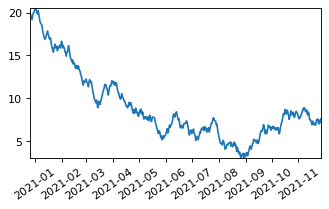

In [13]:
plt.plot(t,T)
plt.xticks(rotation=35)
pass

This works out of the box and typically generates axes labels that make sense. If we reduce the timespan it automatically switches the units.

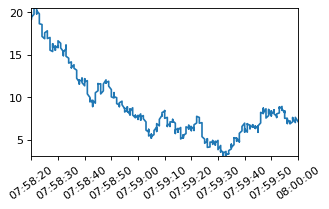

In [14]:
t = np.array(np.linspace(1637999900,1638000000,500),dtype="datetime64[s]") #convert it to np.datetime64 as seconds

plt.plot(t,T)
plt.xticks(rotation=35)
pass

## The more complicated way (but more customizable)
To have more control, we can set the major and minor locators just like above, but now we need `matplotlib.dates` to have things like the `SecondLocator` (and there are of course other Locators for Minutes, Months...).
You can specify e.g. `bysecond=[0,30]` to have a tick always at seconds `00` and `30`, or you simply specify an interval.
If you want to format the labels, you can use something like `mdates.DateFormatter('%H:%M:%S\n%d.%m.%y')`.

In [15]:
import matplotlib.dates as mdates

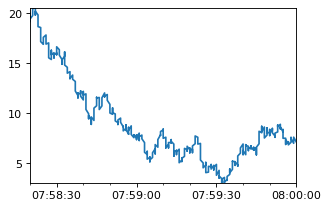

In [16]:
plt.plot(t,T)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.SecondLocator(bysecond=[0,30]))
ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=10))
pass

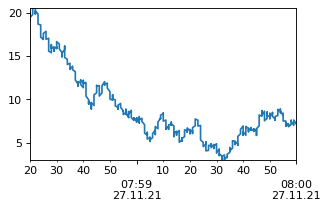

In [17]:
plt.plot(t,T)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MinuteLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%H:%M\n%d.%m.%y'))

ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=10))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%S'))
pass

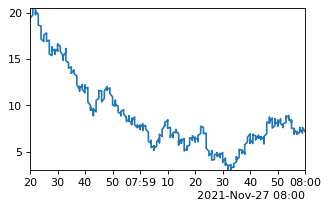

In [18]:
plt.plot(t,T)
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
pass

## Having *y* axes on both sides
Sometimes, you may want to plot different physical quantities in one plot against the same axis. This is rather easy:
  * Do all plotting and formatting on the left (default) *y* axis
  * Use `plt.twinx()` to create a secondary *y* axis
  * Do all plotting and formatting (the secondary axis is now your default one)

Note that you need plt.twin**x**() to create another **y** axis, since the old *x* axis is used twice. You can use different colors and arrows to indicate the corresponding axes. I'm not a big fan of coloring the axes labels, but if you want to do so, you can find the correspondig commands in the comments.

Hint: With the colors `C0,C1,...` you can directly access the default matplotlib colors (blue, orange, ...)

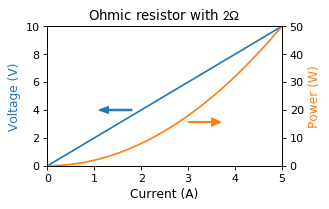

In [19]:
I = np.linspace(0,5,100)
R = 2

plt.plot(I,R*I)
plt.xlabel("Current (A)")
plt.ylabel("Voltage (V)",color="C0")
plt.arrow(1.8,2*R,-.5,0,width=.1,head_width=.5,head_length=0.2,ec="C0")

#plt.tick_params("y",colors="C0")

plt.twinx() # Introduce the secondary y axis

plt.plot(I,R*I**2,color="C1") 
plt.ylabel("Power (W)",color="C1")
plt.arrow(3,R*2.8**2,.5,0,width=.1,head_width=3,head_length=0.2,ec="C1",fc="C1")
#plt.tick_params("y",colors="C1")
plt.title(f"Ohmic resistor with ${R}\Omega$")
plt.show()

In [20]:
a2p = (lambda x: 10*np.log10(np.sqrt(x))-7,
       lambda x: (10**((x+7)/10))**2)

In [21]:
p2p = (lambda x: x-90,
      lambda x:x+90)

In [22]:
a2n = (lambda x: x**2,
      lambda x: np.sqrt(x))

There is arelatively new function `ax.secondary_axis()` which can calculate a secondary axis by forward and inverse transformation functions. However, this creates the ticks at linearly spaced values.

Text(0.5, 1.0, 'resonator photon number $n = \\langle b \\rangle ^2$')

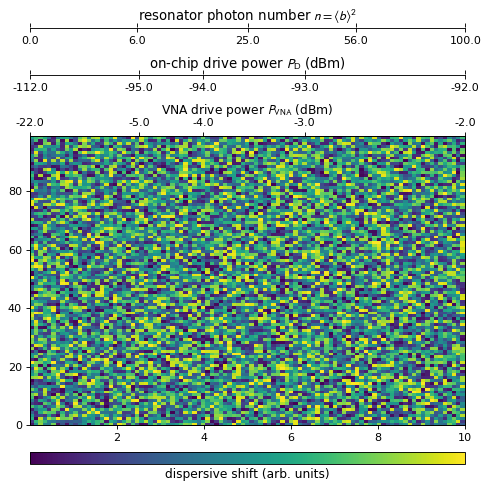

In [23]:
fig, ((ax4,ax3,ax1,cax)) = plt.subplots(nrows=4, ncols=1, sharex=False, sharey=False,
                                        figsize=(6,6),gridspec_kw={"height_ratios":[0.001,0.001,1,0.04]})

pcm = ax1.pcolormesh(np.linspace(0,10,100),np.arange(0,100),np.random.rand(100,100))
cb = fig.colorbar(pcm, cax=cax, orientation="horizontal")
cb.set_ticks([])
cb.set_label("dispersive shift (arb. units)")


ax2 = ax1.twiny()
ax2.set_xlabel(r"VNA drive power $P_\mathrm{VNA}$ (dBm)")

ax1.set_xlim(1e-3,10)
ax2.set_xlim(ax1.get_xlim())

for ax in [ax3,ax4]:
    ax.set_xlim(ax1.get_xlim())
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on',direction='out')


x1 = np.linspace(1e-3,10,5)


x2 = np.around(a2p[0](x1))
ax2.set_xticks(a2p[1](x2))
ax2.set_xticklabels(x2)

x3 = np.around(p2p[0](x2))
ax3.set_xticks(a2p[1](p2p[1](x3)))
ax3.set_xticklabels(x3)

x4 = np.around(a2n[0](x1))
ax4.set_xticks(a2n[1](x4))
ax4.set_xticklabels(x4)

ax3.set_title(r"on-chip drive power $P_\mathrm{D}$ (dBm)")
ax4.set_title(r"resonator photon number $n = \langle b \rangle ^2$")


Text(0.5, 1.0, 'resonator photon number $n = \\langle b \\rangle ^2$')

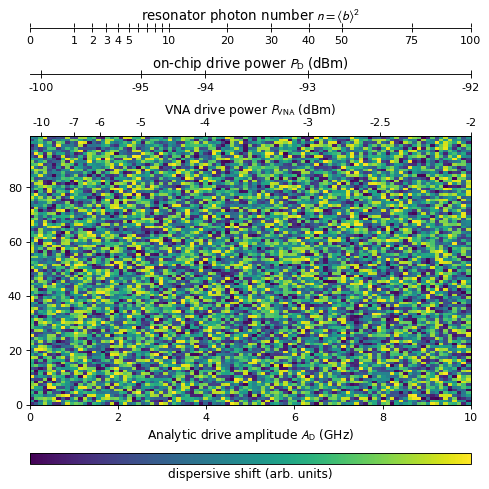

In [24]:
fig, ((ax4,ax3,ax1,cax)) = plt.subplots(nrows=4, ncols=1, sharex=False, sharey=False,
                                        figsize=(6,6),gridspec_kw={"height_ratios":[0.001,0.001,1,0.04]})

ax1.set_xlabel("Analytic drive amplitude $A_\mathrm{D}$ (GHz)")
pcm = ax1.pcolormesh(np.linspace(0,10,100),np.arange(0,100),np.random.rand(100,100))
cb = fig.colorbar(pcm, cax=cax, orientation="horizontal")
cb.set_ticks([])
cb.set_label("dispersive shift (arb. units)")

ax2 = ax1.twiny()
ax2.set_xlabel(r"VNA drive power $P_\mathrm{VNA}$ (dBm)")

ax1.set_xlim(0,10)
ax2.set_xlim(ax1.get_xlim())

for ax in [ax3,ax4]:
    ax.set_xlim(ax1.get_xlim())
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on',direction='out')


x1 = np.linspace(1e-3,10,5)


x2 = np.array([-10,-7,-6,-5,-4,-3,-2.5,-2])#np.around(a2p[0](x1))
ax2.set_xticks(a2p[1](x2))
ax2.set_xticklabels(["{:g}".format(i) for i in x2])

x3 = np.array([-100,-95,-94,-93,-92])#np.around(p2p[0](x2))
ax3.set_xticks(a2p[1](p2p[1](x3)))
ax3.set_xticklabels(x3)

x4 = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,75,100]#np.around(a2n[0](x1))
ax4.set_xticks(a2n[1](np.array(x4)))
x4[6:10] = "    "
ax4.set_xticklabels(x4)

ax3.set_title(r"on-chip drive power $P_\mathrm{D}$ (dBm)")
ax4.set_title(r"resonator photon number $n = \langle b \rangle ^2$")
